In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import warnings
import os

from sklearn.model_selection import train_test_split, KFold, cross_val_score, cross_validate, GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.decomposition import PCA, KernelPCA
from sklearn.tree import DecisionTreeRegressor

from sklearn.datasets import load_boston

from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.neighbors import KNeighborsRegressor
from sklearn.cluster import KMeans, SpectralClustering

from pprint import pprint

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
# output directory
dir_out = "out"
if not os.path.exists(dir_out):
    os.mkdir(dir_out)

Load dataset

In [4]:
boston = load_boston()
data = pd.DataFrame(boston.data, columns = boston.feature_names)
data["MEDV"] = boston.target

Analysis

In [4]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


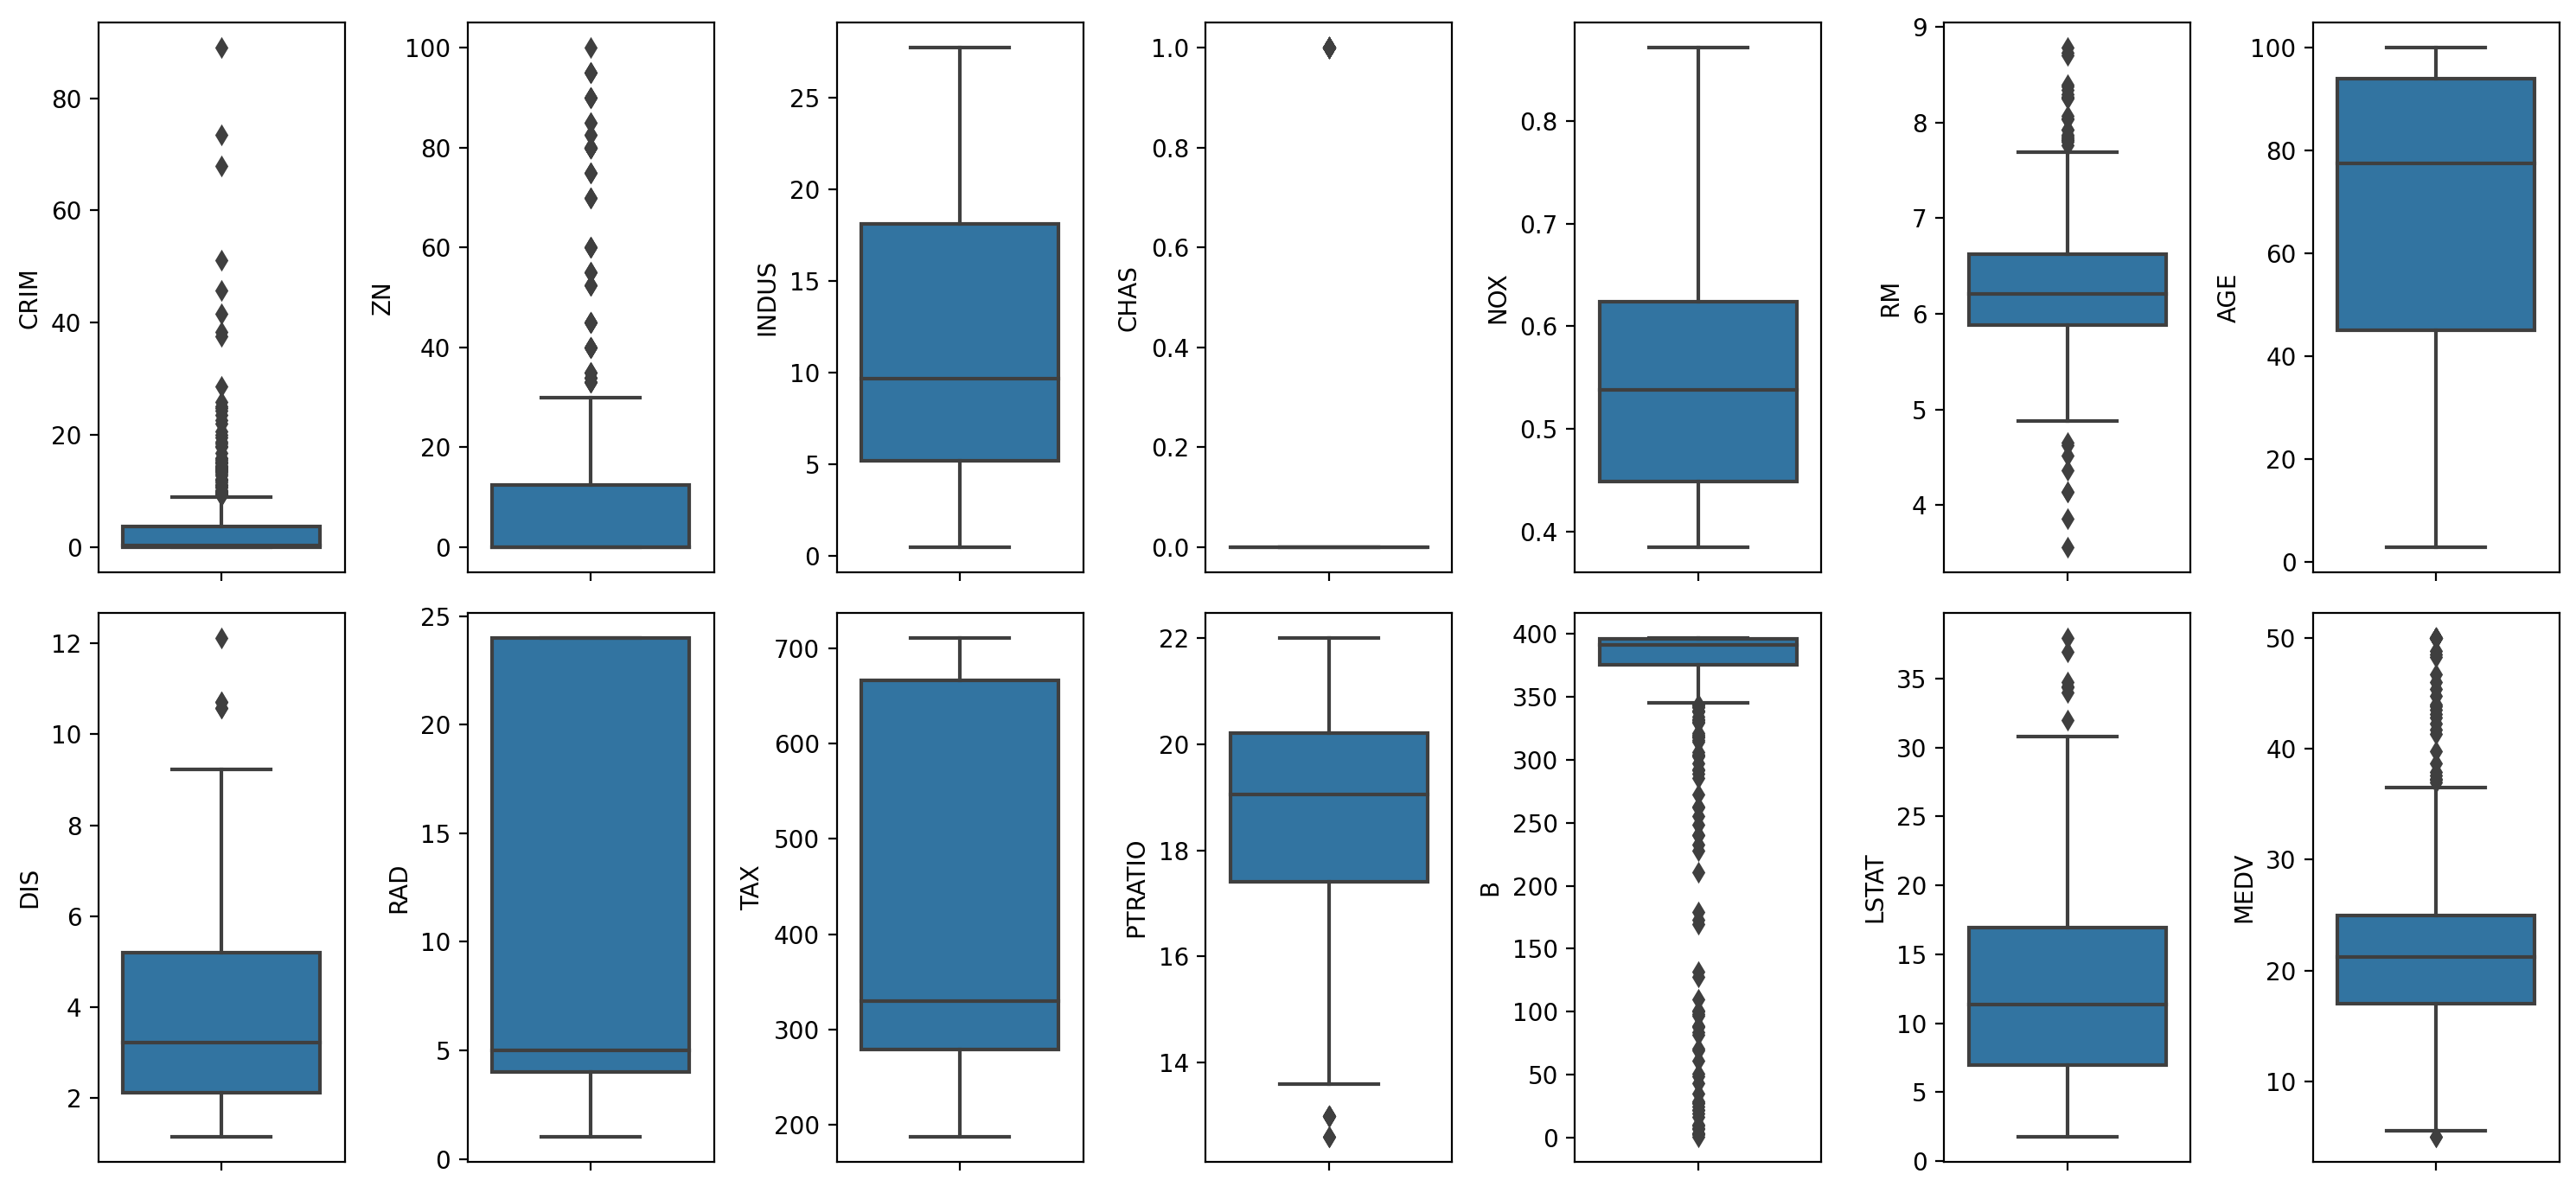

In [5]:
plt.figure(figsize = (15, 7), dpi = 200)
for i, (feature, value) in enumerate(data.items()):
    plt.subplot(2, 7, i + 1)
    sns.boxplot(y = feature, data = data)
    plt.tight_layout()

In [6]:
# ???
# data = data[~(data['MEDV'] >= 50.0)]
# print(np.shape(data))

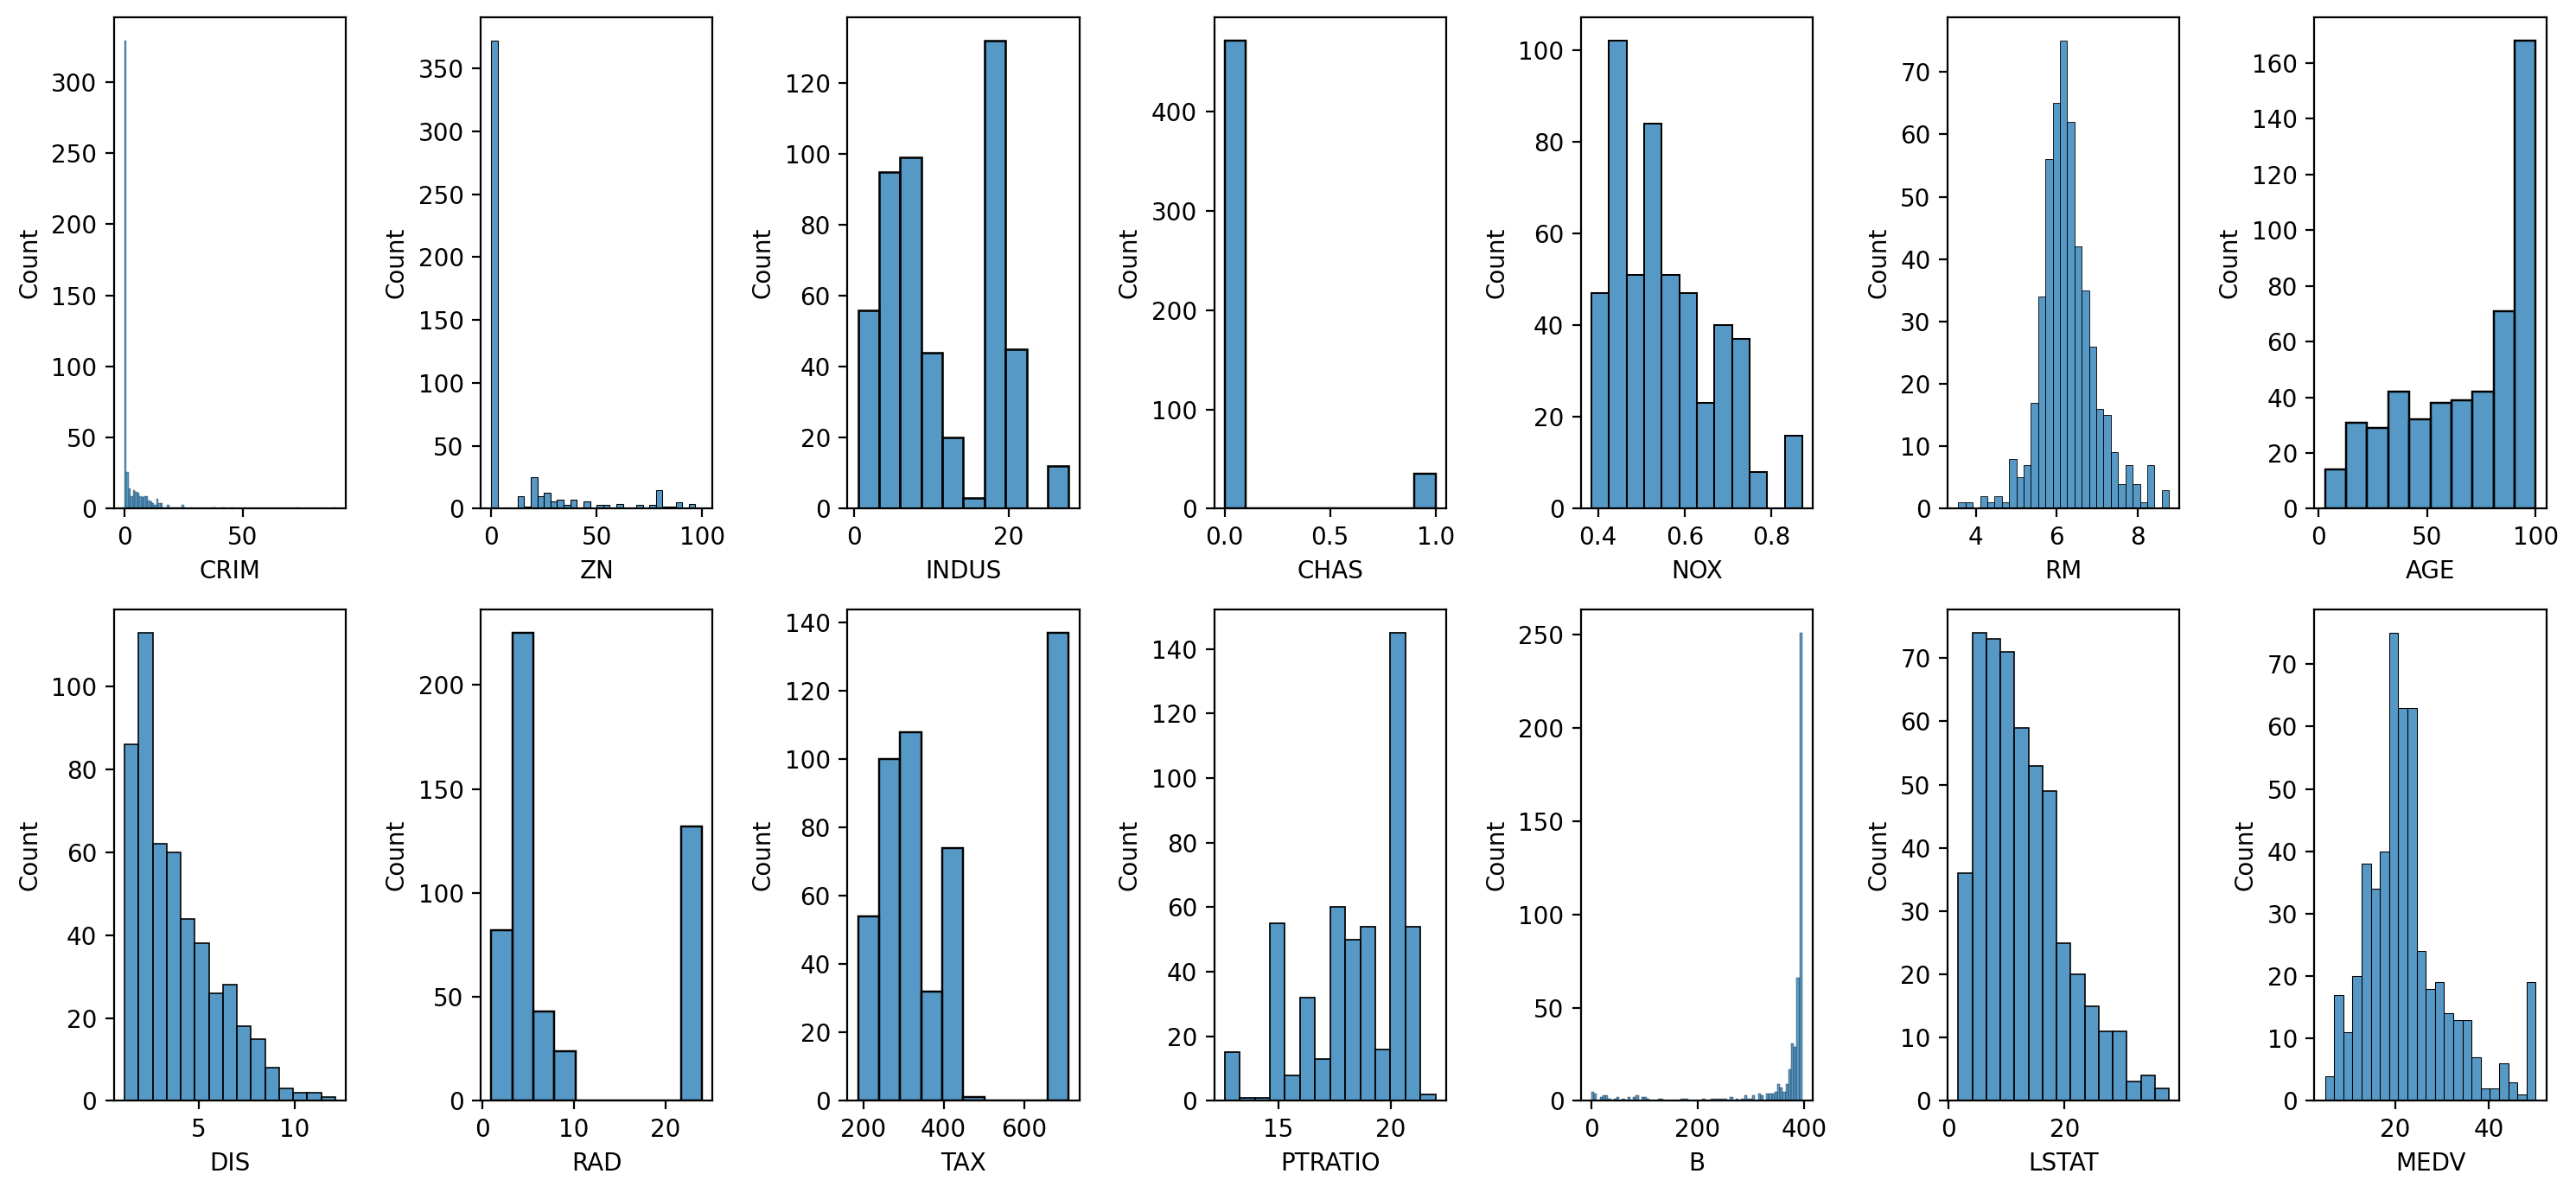

In [89]:
plt.figure(figsize = (15, 7), dpi = 200)
for i, (feature, value) in enumerate(data.items(), 0):
    plt.subplot(2, 7, i + 1)
    sns.histplot(data, x = feature)
    plt.tight_layout()

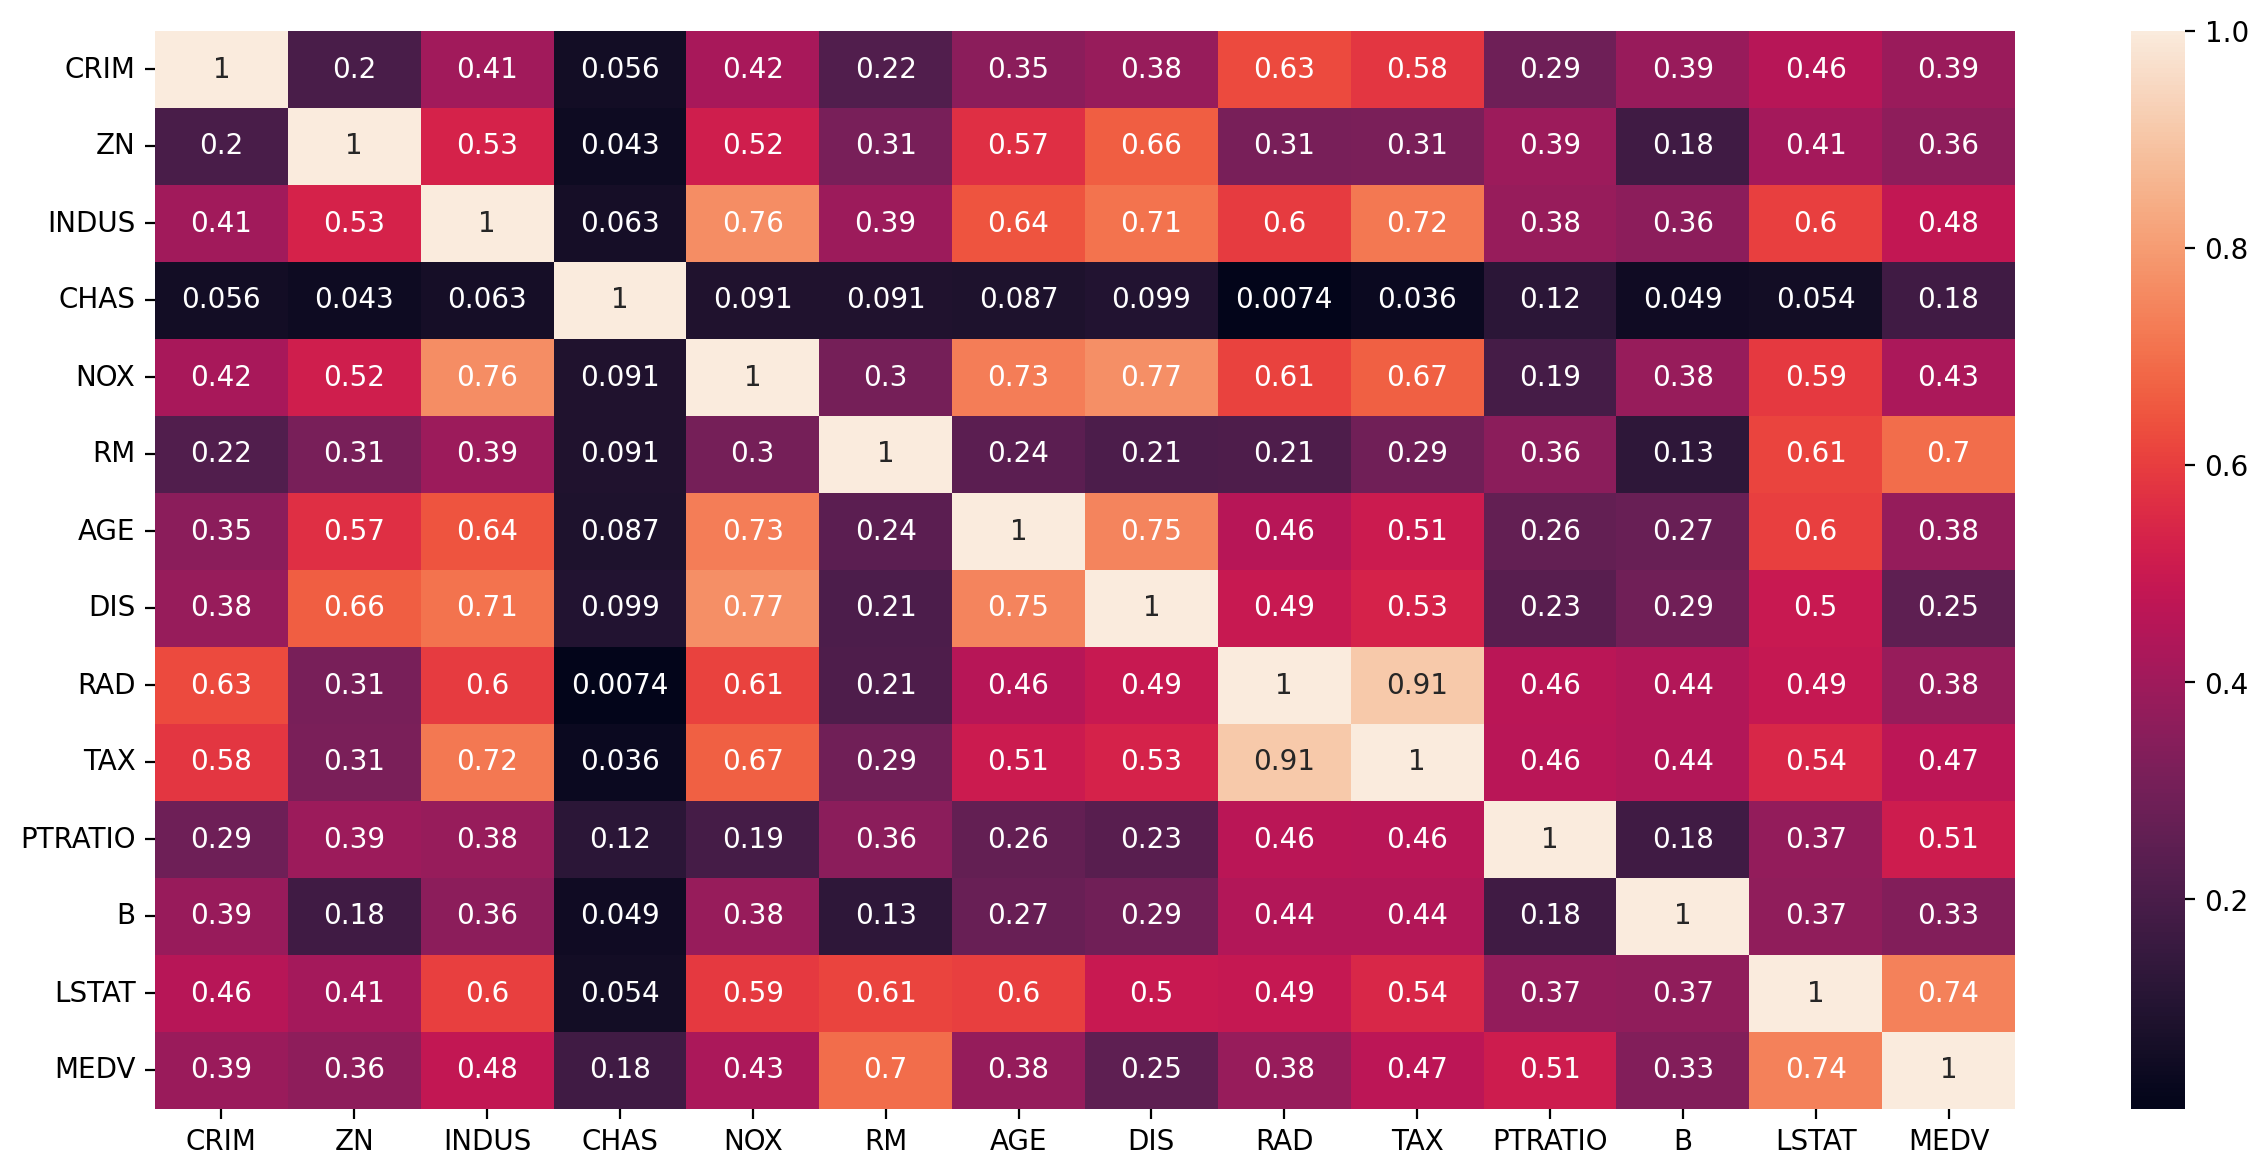

In [7]:
plt.figure(figsize = (15, 7), dpi = 200)
sns.heatmap(data.corr().abs(),  annot=True)
plt.savefig(os.path.join(dir_out, f"heatmap_raw"), bbox_inches='tight')

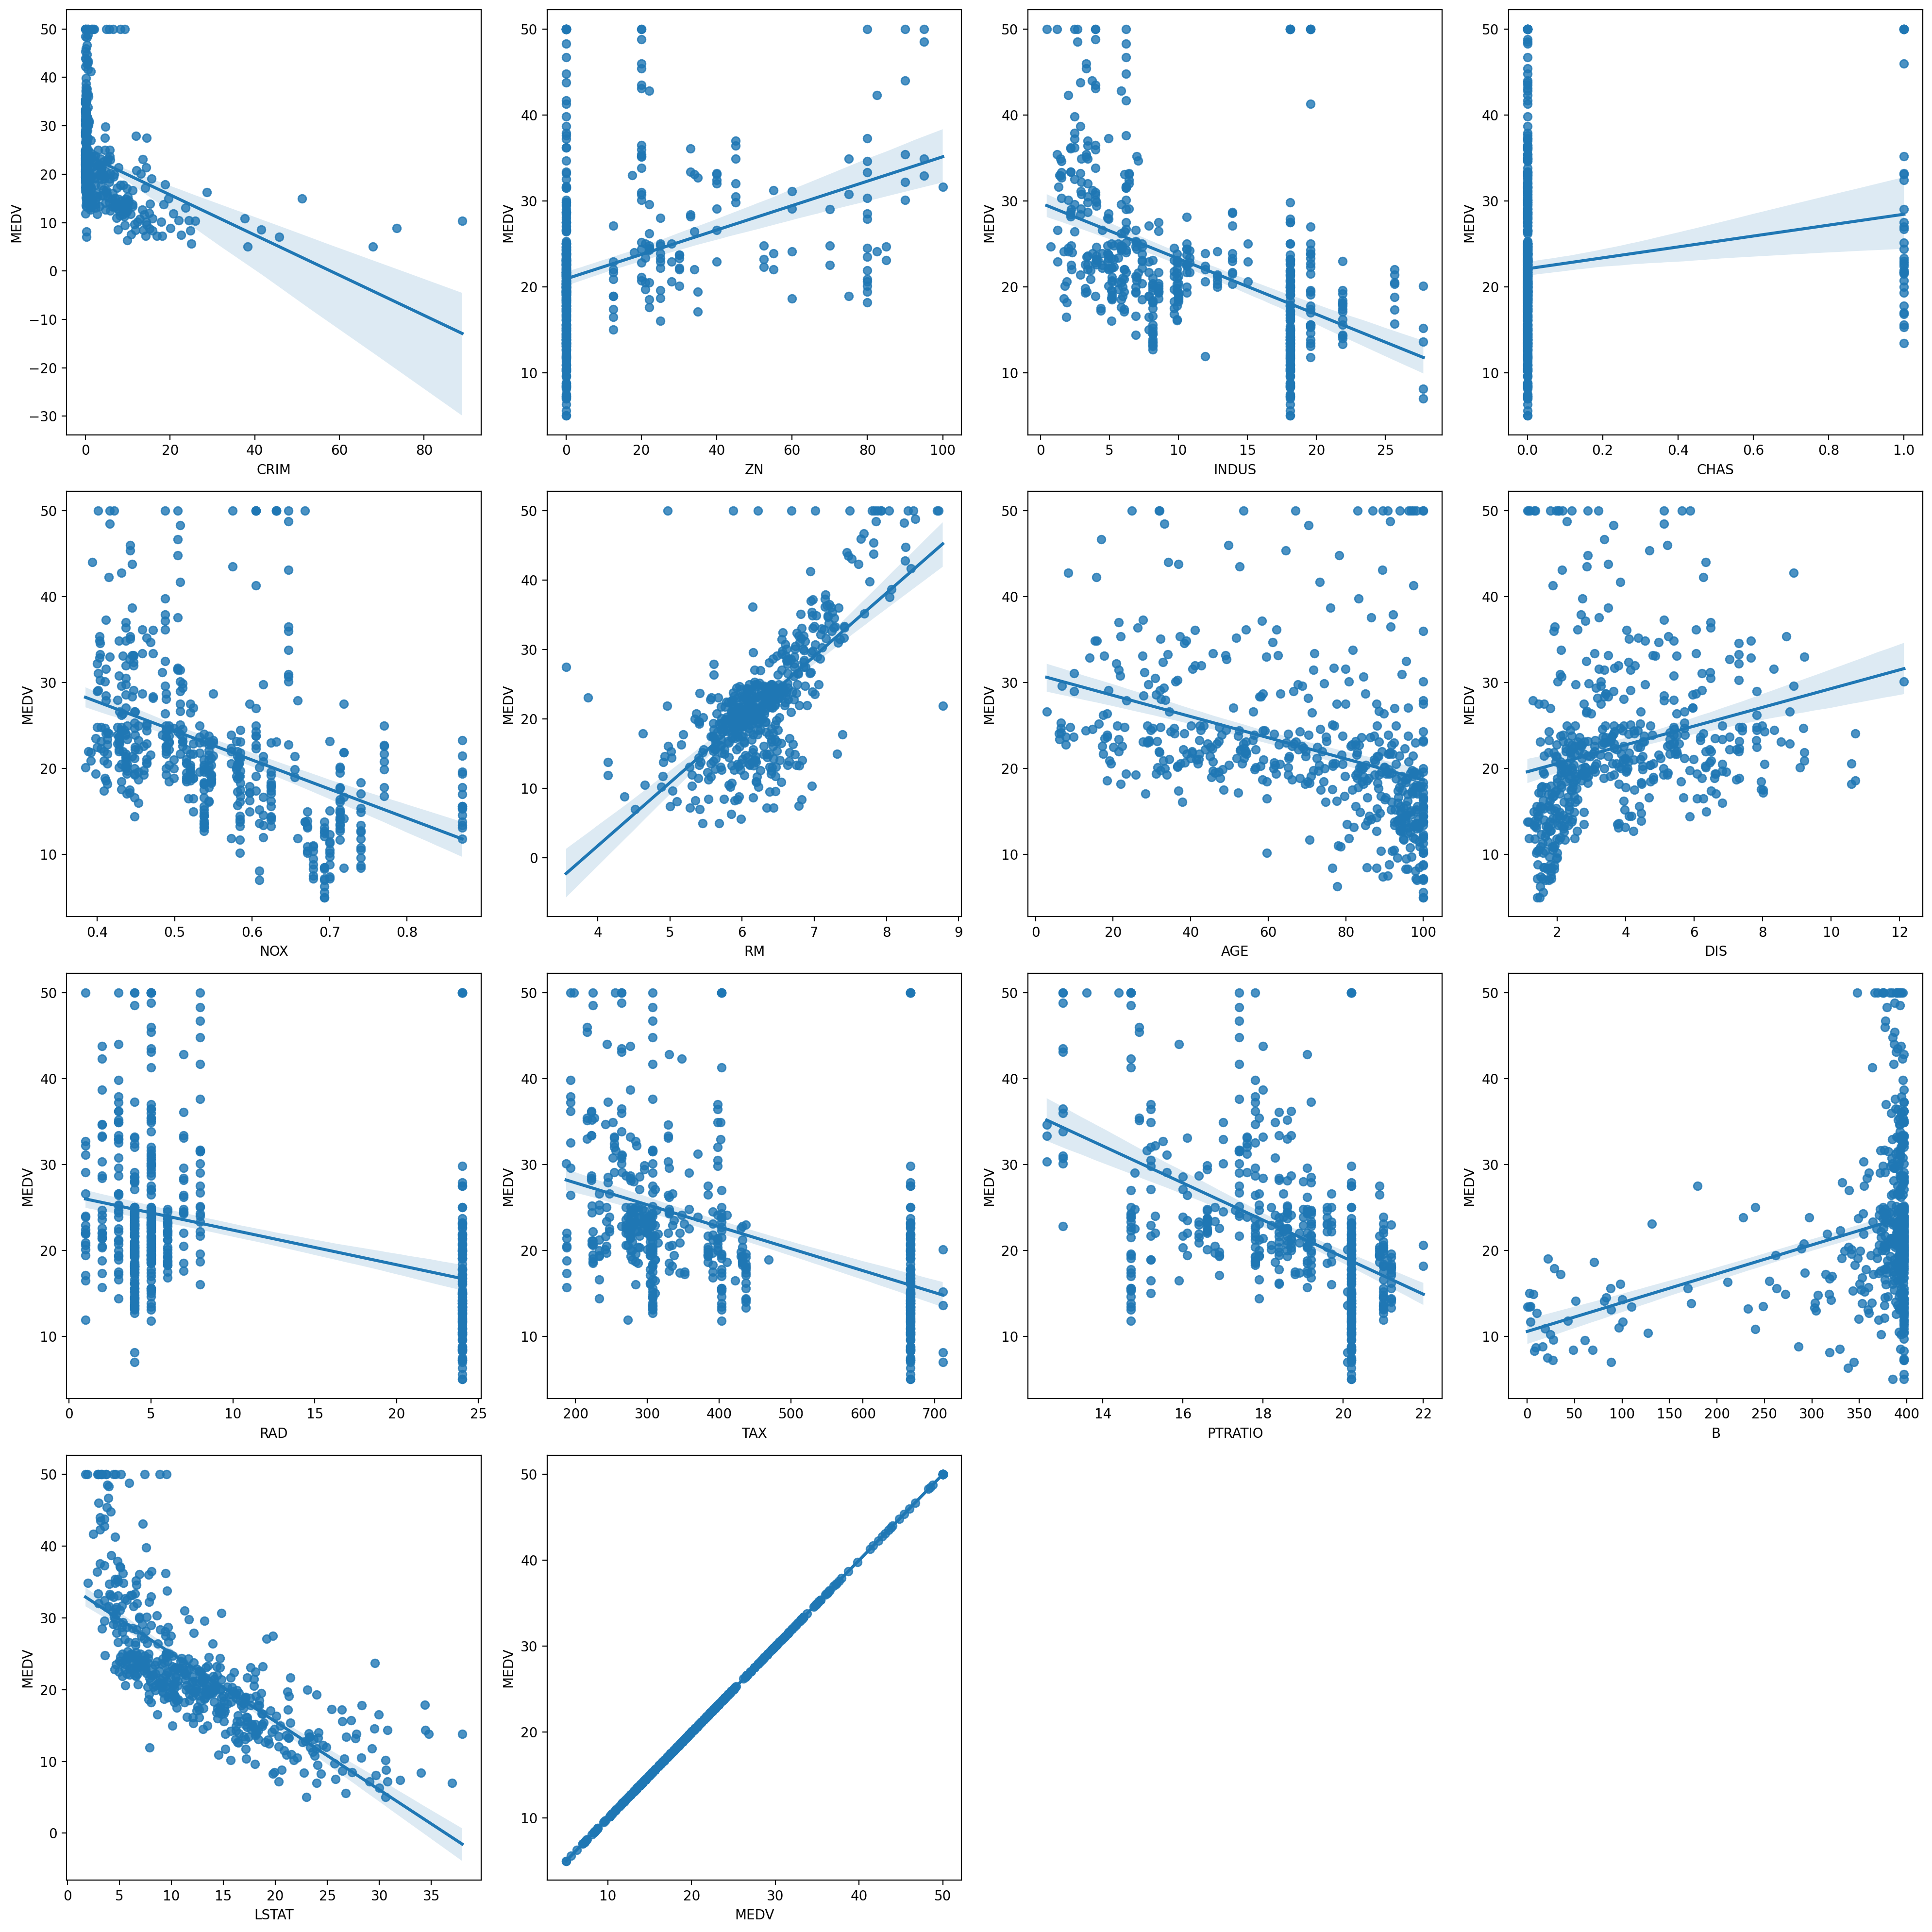

In [127]:
plt.figure(figsize = (20, 20), dpi = 200)
for i, (feature, value) in enumerate(data.items(), 0):
    plt.subplot(4, 4, i + 1)
    sns.regplot(y = data["MEDV"], x = value)
    plt.tight_layout()